<b> Problem 1 Data on the butterfat content of milk from Canadian cows of five different
breeds and two different ages can be found in the butterfat data set.
    
(a) Make appropriate plots of the data.
    
(b) Fit a two-way ANOVA model. Determine whether there is an interaction between breed
and age. Present model diagnostics and make changes if necessary.
    
(c) Determine whether there is a statistically significant difference between breeds and age.
    
(d) Present regression diagnostics for the chosen model and comment whether the assump-
tions have been met.
    
(e) Compare the best breed in terms of butterfat content with the second best breed. Is the
best breed clearly superior?

<b>Description of Data:</b> Average butterfat content (percentages) of milk for random samples of twenty cows (ten two-year old and ten mature (greater than four years old)) from each of five breeds. The data are from Canadian records of pure-bred dairy cattle

A data frame with 100 observations on the following 3 variables.

* Butterfat
    * butter fat content by percentage

* Breed
    * a factor with levels Ayrshire Canadian Guernsey Holstein-Fresian Jersey

* Age
    * a factor with levels 2year Mature

In [3]:
library('faraway')
library('ggplot2')
data(butterfat)
head(butterfat, 4)

Butterfat,Breed,Age
3.74,Ayrshire,Mature
4.01,Ayrshire,2year
3.77,Ayrshire,Mature
3.78,Ayrshire,2year


In [4]:
summary(butterfat)

   Butterfat                  Breed        Age    
 Min.   :3.300   Ayrshire        :20   2year :50  
 1st Qu.:3.938   Canadian        :20   Mature:50  
 Median :4.405   Guernsey        :20              
 Mean   :4.482   Holstein-Fresian:20              
 3rd Qu.:4.987   Jersey          :20              
 Max.   :6.550                                    

<b>(a) Make appropriate plots of the data.

Warning message:
"Ignoring unknown parameters: fun"Warning message:
"Ignoring unknown parameters: fun"No summary function supplied, defaulting to `mean_se()
No summary function supplied, defaulting to `mean_se()


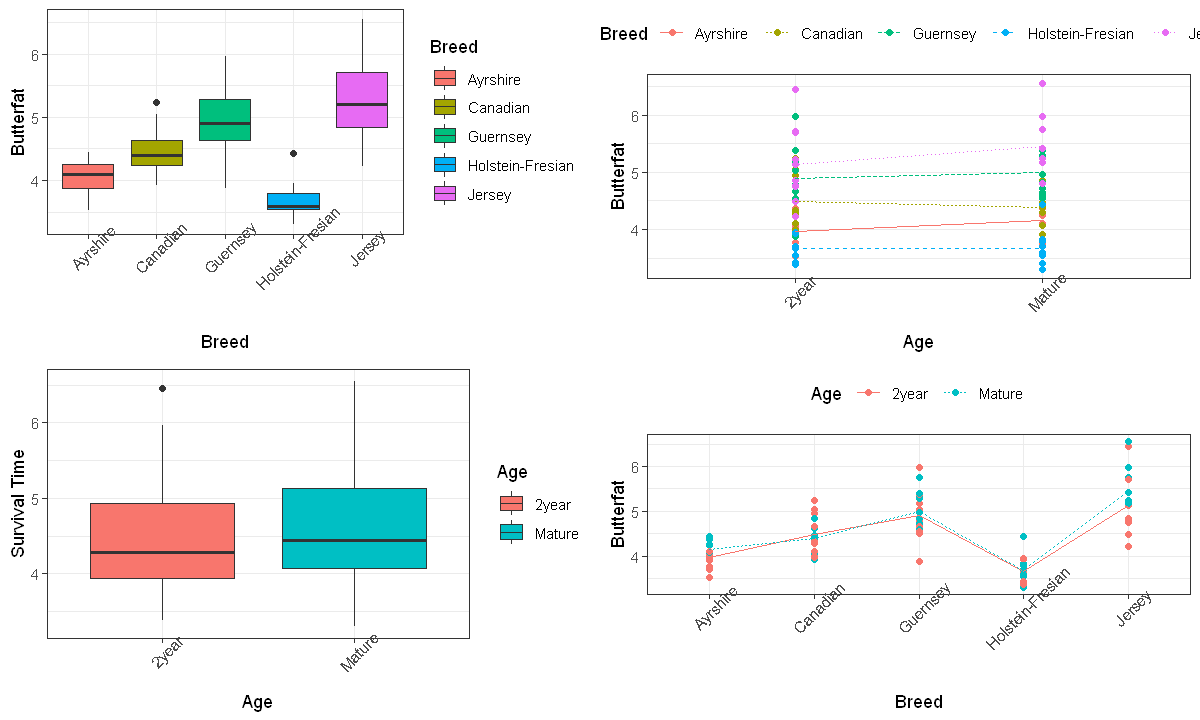

In [29]:
library(gridExtra)
options(repr.plot.width=10, repr.plot.height=6)

p1 = ggplot(aes(x=Breed, y=Butterfat, fill = Breed), data=butterfat) +
  theme_set(theme_bw())+
  geom_boxplot() +
  theme(axis.text.x = element_text(angle=45)) + 
  ylab("Butterfat")

p3 = ggplot(aes(x=Age, y=Butterfat, fill = Age), data=butterfat) + 
  geom_boxplot() +
  theme(axis.text.x = element_text(angle=45)) + 
  ylab("Survival Time")

p2 = ggplot(butterfat, aes(x=Age, y=Butterfat, color = Breed)) + 
  geom_point() + 
  stat_summary(fun="mean", geom="line", aes(group=Breed, linetype=Breed))+
  theme(axis.text.x = element_text(angle=45)) + 
  theme(legend.position = "top", legend.direction = "horizontal")

p4 = ggplot(butterfat, aes(x=Breed, y=Butterfat, color = Age)) + 
  geom_point() + 
  stat_summary(fun="mean", geom="line", aes(group=Age, linetype=Age))+
  theme(axis.text.x = element_text(angle=45)) + 
  theme(legend.position = "top", legend.direction = "horizontal")

grid.arrange(p1, p2, p3, p4, nrow = 2)

<b>(b) Fit a two-way ANOVA model. Determine whether there is an interaction between breed and age. Present model diagnostics and make changes if necessary.

In [8]:
mod_two_way_anova = lm(Butterfat ~ Age*Breed, butterfat)
round(anova(mod_two_way_anova),4)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Age,1,0.2735,0.2735,1.5801,0.2120
Breed,4,34.3213,8.5803,49.5651,0.0000
Age:Breed,4,0.5139,0.1285,0.7421,0.5658
Residuals,90,15.5801,0.1731,NA,NA


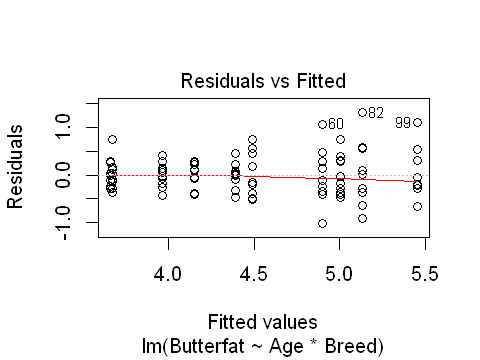

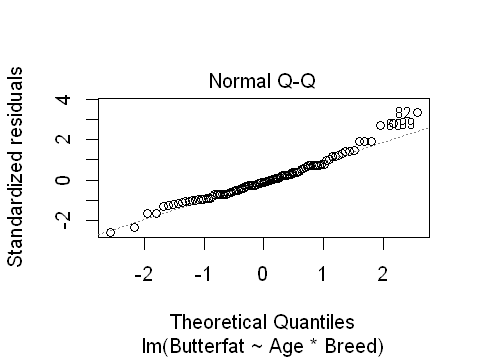

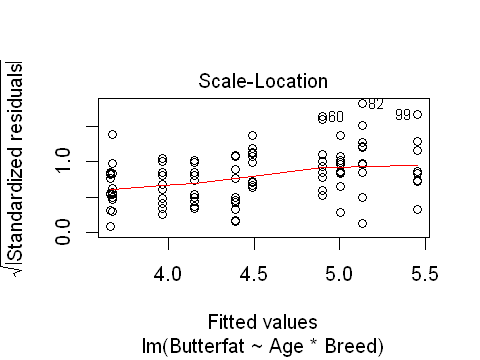

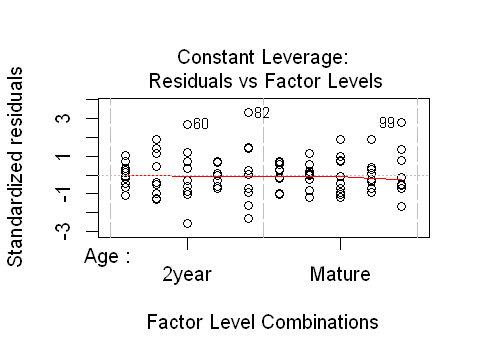

In [9]:
options(repr.plot.width=4, repr.plot.height=3)
p1 = plot(mod_two_way_anova)

* From diognostic plots, the data seems to follow normality. Residuals are also centered at zero.

<b>(c) Determine whether there is a statistically significant difference between breeds and age.

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = Butterfat ~ Age * Breed, data = butterfat)

$Breed
                             diff         lwr         upr     p adj
Canadian-Ayrshire          0.3785  0.01222214  0.74477786 0.0392321
Guernsey-Ayrshire          0.8900  0.52372214  1.25627786 0.0000000
Holstein-Fresian-Ayrshire -0.3905 -0.75677786 -0.02422214 0.0306852
Jersey-Ayrshire            1.2325  0.86622214  1.59877786 0.0000000
Guernsey-Canadian          0.5115  0.14522214  0.87777786 0.0017719
Holstein-Fresian-Canadian -0.7690 -1.13527786 -0.40272214 0.0000008
Jersey-Canadian            0.8540  0.48772214  1.22027786 0.0000000
Holstein-Fresian-Guernsey -1.2805 -1.64677786 -0.91422214 0.0000000
Jersey-Guernsey            0.3425 -0.02377786  0.70877786 0.0783045
Jersey-Holstein-Fresian    1.6230  1.25672214  1.98927786 0.0000000


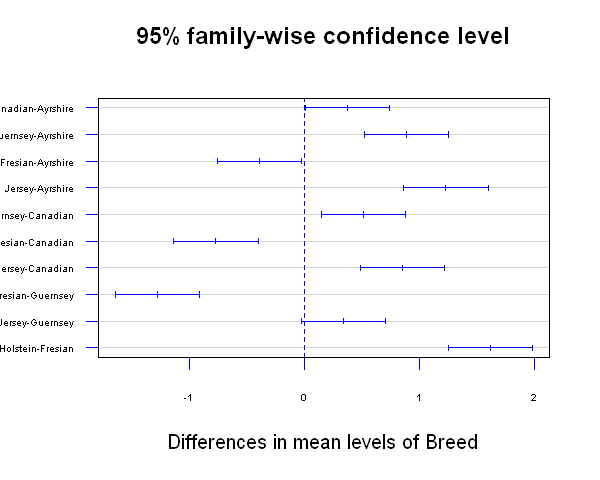

In [18]:
confidence_intervals = TukeyHSD(aov(Butterfat ~ Age*Breed, data = butterfat), 'Breed')
confidence_intervals
options(repr.plot.width=5, repr.plot.height=4)
plot(confidence_intervals, las=1, cex.axis = 0.5, col = 'blue')

In [11]:
confidence_intervals = TukeyHSD(aov(Butterfat ~ Breed*Age, data = butterfat), 'Age')
confidence_intervals

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = Butterfat ~ Breed * Age, data = butterfat)

$Age
               diff         lwr       upr     p adj
Mature-2year 0.1046 -0.06071833 0.2699183 0.2120038


In [12]:
confidence_intervals = TukeyHSD(aov(Butterfat ~ Breed*Age, data = butterfat))
round(confidence_intervals$`Breed:Age`,3)

,diff,lwr,upr,p adj
Canadian:2year-Ayrshire:2year,0.522,-0.082,1.126,0.150
Guernsey:2year-Ayrshire:2year,0.933,0.329,1.537,0.000
Holstein-Fresian:2year-Ayrshire:2year,-0.303,-0.907,0.301,0.831
Jersey:2year-Ayrshire:2year,1.167,0.563,1.771,0.000
Ayrshire:Mature-Ayrshire:2year,0.188,-0.416,0.792,0.991
Canadian:Mature-Ayrshire:2year,0.423,-0.181,1.027,0.416
Guernsey:Mature-Ayrshire:2year,1.035,0.431,1.639,0.000
Holstein-Fresian:Mature-Ayrshire:2year,-0.290,-0.894,0.314,0.864
Jersey:Mature-Ayrshire:2year,1.486,0.882,2.090,0.000
Guernsey:2year-Canadian:2year,0.411,-0.193,1.015,0.459


In [16]:
# options(repr.plot.width=5, repr.plot.height=4)
# plot(confidence_intervals, las=1, cex.axis = 0.5, col = 'blue')

* As can be seen from the above analysis, there are significant differences among breeds and butterfat.
* However, there are not significant differences between age.
* There are signficant differences among age*breed interactions.

<b>(d) Present regression diagnostics for the chosen model and comment whether the assump- tions have been met.

d.1 Testing the normality assumption

In [81]:
shapiro.test(mod_two_way_anova$residuals)


	Shapiro-Wilk normality test

data:  mod_two_way_anova$residuals
W = 0.96828, p-value = 0.01635


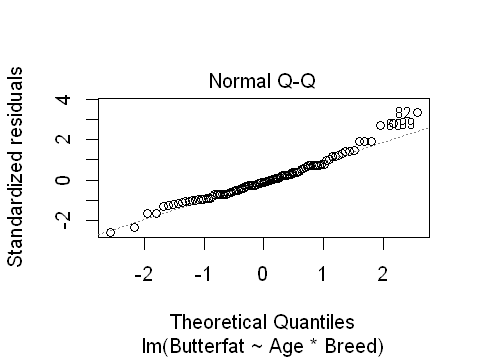

In [19]:
options(repr.plot.width=4, repr.plot.height=3)
plot(mod_two_way_anova,2)

* We can see that From Shapiro-Wilk normality test, we reject the null hypothesis that errors are normally distributed.
* Let's try to apply transformations to see if the normality asssumption can be achieved.

In [20]:
mod_two_way_anova1 = lm(log(Butterfat) ~ Age*Breed, butterfat)
round(anova(mod_two_way_anova),4)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Age,1,0.2735,0.2735,1.5801,0.2120
Breed,4,34.3213,8.5803,49.5651,0.0000
Age:Breed,4,0.5139,0.1285,0.7421,0.5658
Residuals,90,15.5801,0.1731,NA,NA



	Shapiro-Wilk normality test

data:  mod_two_way_anova1$residuals
W = 0.98638, p-value = 0.3975


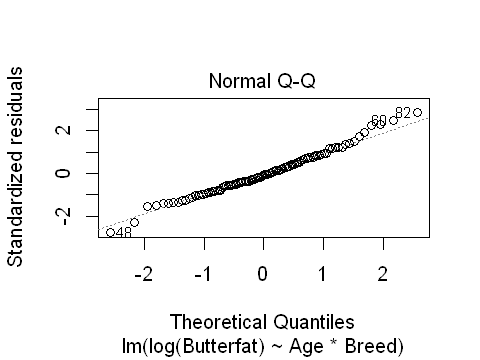

In [21]:
shapiro.test(mod_two_way_anova1$residuals)
plot(mod_two_way_anova1, 2)

* After applying log transformation to response variable, the errors are now normally distributed. We can confirm this from Shapiro-Wilk normality test.

b.2 Test for equal variances

In [25]:
library(car)
leveneTest(mod_two_way_anova1)

,Df,F value,Pr(>F)
group,9,1.219051,0.2934263
,90,NA,NA


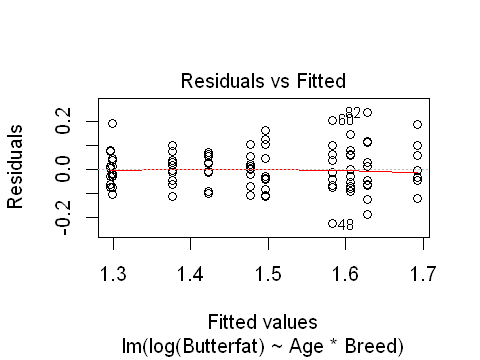

In [26]:
plot(mod_two_way_anova1, 1)

* From the Levene test for equal variances as well from residual plot, we accept the null hypothesis. Residuals are having constant variances.

<b>(e) Compare the best breed in terms of butterfat content with the second best breed. Is the best breed clearly superior?

No summary function supplied, defaulting to `mean_se()
No summary function supplied, defaulting to `mean_se()


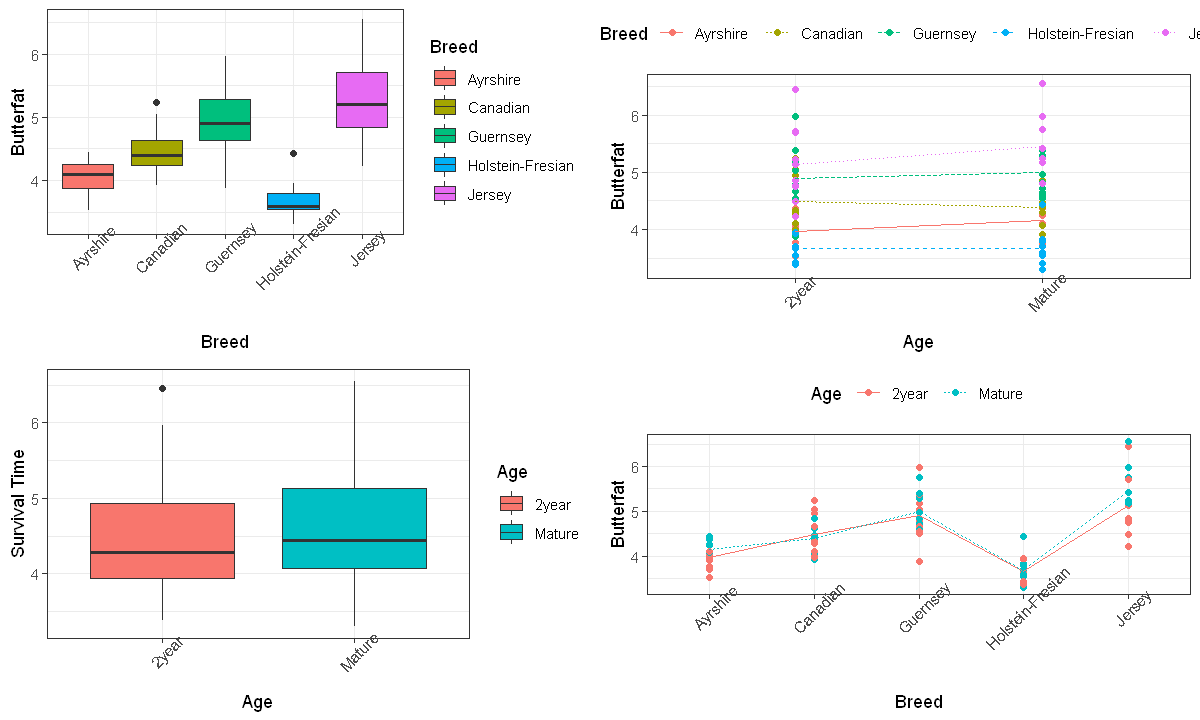

In [30]:
grid.arrange(p1, p2, p3, p4, nrow = 2)

* From the above plot, we can see that Jersey and Guernsey are the two best breeds that produced highest butterfat among the five breeds.

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = log(Butterfat) ~ Age * Breed, data = butterfat)

$Breed
                                 diff         lwr         upr     p adj
Canadian-Ayrshire          0.08798426  0.01156995  0.16439858 0.0156494
Guernsey-Ayrshire          0.19564150  0.11922719  0.27205582 0.0000000
Holstein-Fresian-Ayrshire -0.10139038 -0.17780469 -0.02497607 0.0034036
Jersey-Ayrshire            0.26111862  0.18470431  0.33753293 0.0000000
Guernsey-Canadian          0.10765724  0.03124293  0.18407155 0.0015736
Holstein-Fresian-Canadian -0.18937464 -0.26578895 -0.11296033 0.0000000
Jersey-Canadian            0.17313436  0.09672005  0.24954867 0.0000001
Holstein-Fresian-Guernsey -0.29703188 -0.37344619 -0.22061757 0.0000000
Jersey-Guernsey            0.06547712 -0.01093719  0.14189143 0.1287849
Jersey-Holstein-Fresian    0.36250900  0.28609469  0.43892331 0.0000000


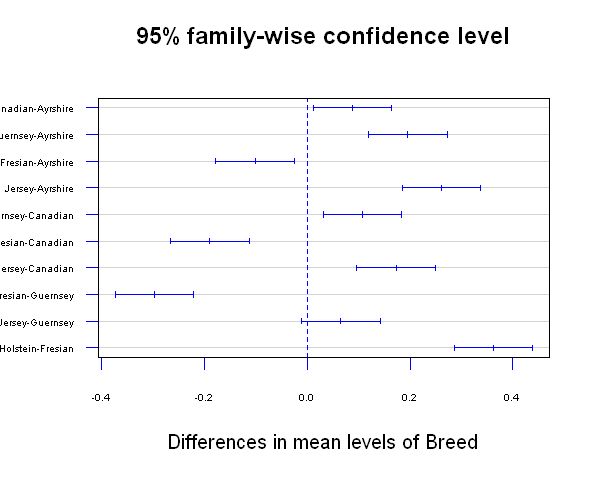

In [31]:
confidence_intervals = TukeyHSD(aov(log(Butterfat) ~ Age*Breed, data = butterfat), 'Breed')
confidence_intervals
options(repr.plot.width=5, repr.plot.height=4)
plot(confidence_intervals, las=1, cex.axis = 0.5, col = 'blue')

* As can be seen from the above confidence interval plot for Jersey-Guernsey, the confidence interval includes zero. Hence, the butterfat content of Jersey is not statistically significant than Guernsey.

<b>Problem 2: The morley data can be viewed as a randomized block experiment with Run as
the treatment factor and Expt as the blocking factor.
    
(a) Is there a difference between runs?
    
(b) What efficiency is gained by blocking?

In [61]:
data(morley)
head(morley)
morley$Expt = factor(morley$Expt)
morley$Run = factor(morley$Run)
summary(morley)

,Expt,Run,Speed
001,1,1,850
002,1,2,740
003,1,3,900
004,1,4,1070
005,1,5,930
006,1,6,850


 Expt        Run         Speed       
 1:20   1      : 5   Min.   : 620.0  
 2:20   2      : 5   1st Qu.: 807.5  
 3:20   3      : 5   Median : 850.0  
 4:20   4      : 5   Mean   : 852.4  
 5:20   5      : 5   3rd Qu.: 892.5  
        6      : 5   Max.   :1070.0  
        (Other):70                   

<b>(a) Is there a difference between runs?

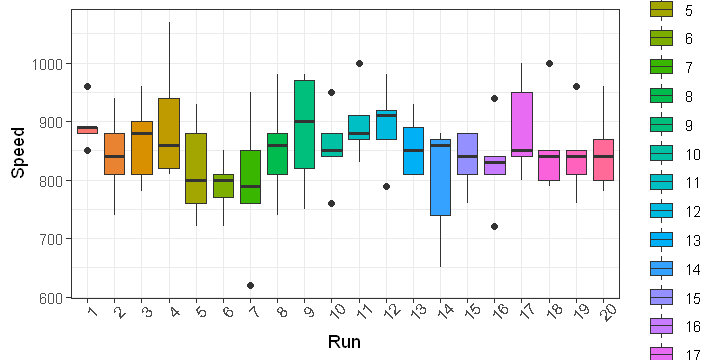

In [62]:
options(repr.plot.width=6, repr.plot.height=3)

p1 = ggplot(aes(x=Run, y=Speed, fill = Run), data=morley) +
  theme_set(theme_bw())+
  geom_boxplot() +
  theme(axis.text.x = element_text(angle=45)) + 
  ylab("Speed")
p1

In [98]:
mod = aov(Speed ~ Run + Expt, data = morley)                 
summary(mod)

            Df Sum Sq Mean Sq F value  Pr(>F)   
Run         19 113344    5965   1.105 0.36321   
Expt         4  94514   23629   4.378 0.00307 **
Residuals   76 410166    5397                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

* Since P value for Run is greater than the significance level of 5%, we conclude that there is no difference between runs.

<b>(b) What efficiency is gained by blocking?

* When we introduce blocking, we can see, it has p value 0.00307. This p value is much lower than our significance level. Hence blocking is useful.
* Mean squared error is reduced from 5965 to 5397 by blocking.

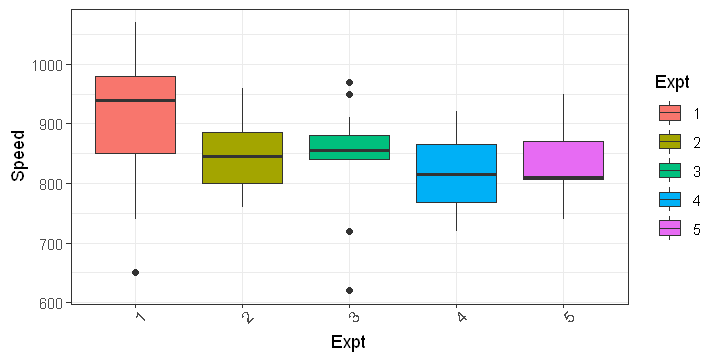

In [65]:
options(repr.plot.width=6, repr.plot.height=3)

p1 = ggplot(aes(x=Expt, y=Speed, fill = Expt), data=morley) +
  theme_set(theme_bw())+
  geom_boxplot() +
  theme(axis.text.x = element_text(angle=45)) + 
  ylab("Speed")
p1

<b>Problem 3: The alfalfa data arise from a Latin aquare design where the treatment factor is
inoculum and the blocking factors are shade and irrigation.

(a) Test the significance of the effects.
    
(b) Determine which levels of the treatment factor are significantly different.

In [67]:
data(alfalfa)
head(alfalfa)

shade,irrigation,inoculum,yield
1,1,A,33.8
1,2,B,33.7
1,3,D,30.4
1,4,C,32.7
1,5,E,24.4
2,1,D,37.0


<b>Description of Data:</b>

This data frame contains the following columns:

* shade
    * Distance of location from tree line divided into 5 shade areas

* irrigation
    * Irrigation effect divided into 5 levels

* inoculum
 * Four types of seed incolum, A-D with E as control.

* yield
    * Dry matter yield of alfalfa

In [69]:
summary(alfalfa)
nrow(alfalfa)

 shade irrigation inoculum     yield      
 1:5   1:5        A:5      Min.   :24.40  
 2:5   2:5        B:5      1st Qu.:33.20  
 3:5   3:5        C:5      Median :34.60  
 4:5   4:5        D:5      Mean   :34.11  
 5:5   5:5        E:5      3rd Qu.:36.90  
                           Max.   :39.10  

[1] 25

<b>(a) Test the significance of the effects.

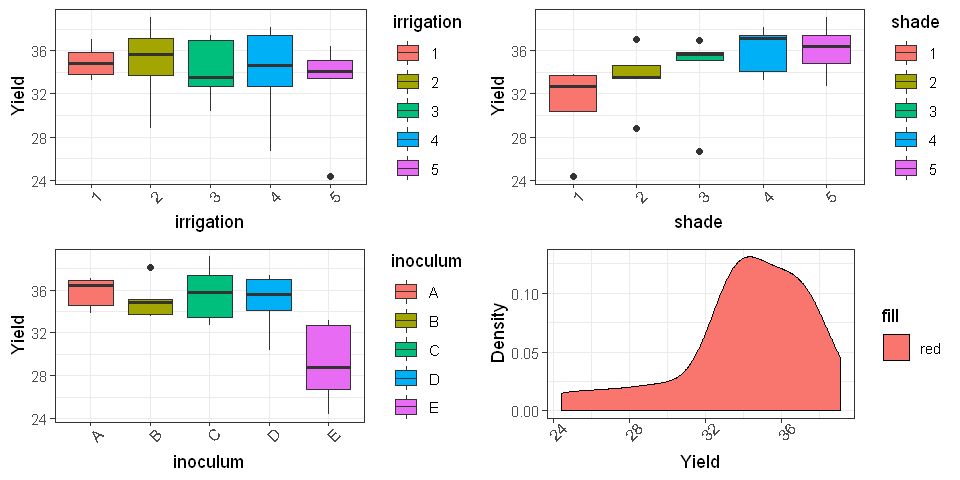

In [95]:
options(repr.plot.width=8, repr.plot.height=4)

p1 = ggplot(aes(x=irrigation, y=yield, fill = irrigation ), data=alfalfa) +
  theme_set(theme_bw())+
  geom_boxplot() +
  theme(axis.text.x = element_text(angle=45)) + 
  ylab("Yield")

p2 = ggplot(aes(x=shade , y=yield, fill = shade  ), data=alfalfa) +
  theme_set(theme_bw())+
  geom_boxplot() +
  theme(axis.text.x = element_text(angle=45)) + 
  ylab("Yield")

p3 = ggplot(aes(x=inoculum, y=yield, fill = inoculum), data=alfalfa) +
  theme_set(theme_bw())+
  geom_boxplot() +
  theme(axis.text.x = element_text(angle=45)) + 
  ylab("Yield")

p4 = ggplot(alfalfa, aes(x= alfalfa$yield, fill = 'red')) +
  theme_set(theme_bw())+
   geom_density()+
  theme(axis.text.x = element_text(angle=45)) + 
  ylab("Density")+
  xlab('Yield')

grid.arrange(p1, p2, p3, p4, nrow = 2)

In [102]:
mod = anova(lm(yield ~ inoculum + irrigation + shade, data = alfalfa))
mod

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
inoculum,4,155.8944,38.9736,12.709059,0.0002839824
irrigation,4,16.5624,4.1406,1.350225,0.3078717042
shade,4,87.4024,21.8506,7.125351,0.0035328694
Residuals,12,36.7992,3.0666,NA,NA


* Irrigation is not significant at 5% $\alpha$ level.

In [107]:
mod = anova(lm(yield ~ inoculum + shade, data = alfalfa))
mod

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
inoculum,4,155.8944,38.9736,11.685886,0.0001244553
shade,4,87.4024,21.8506,6.551708,0.0025449365
Residuals,16,53.3616,3.3351,NA,NA


<b>(b) Determine which levels of the treatment factor are significantly different.

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = yield ~ inoculum + shade + irrigation, data = alfalfa)

$inoculum
     diff        lwr       upr     p adj
B-A -0.72  -4.250202  2.810202 0.9633433
C-A -0.08  -3.610202  3.450202 0.9999928
D-A -0.86  -4.390202  2.670202 0.9326392
E-A -6.60 -10.130202 -3.069798 0.0005166
C-B  0.64  -2.890202  4.170202 0.9759059
D-B -0.14  -3.670202  3.390202 0.9999332
E-B -5.88  -9.410202 -2.349798 0.0014163
D-C -0.78  -4.310202  2.750202 0.9515868
E-C -6.52 -10.050202 -2.989798 0.0005764
E-D -5.74  -9.270202 -2.209798 0.0017334


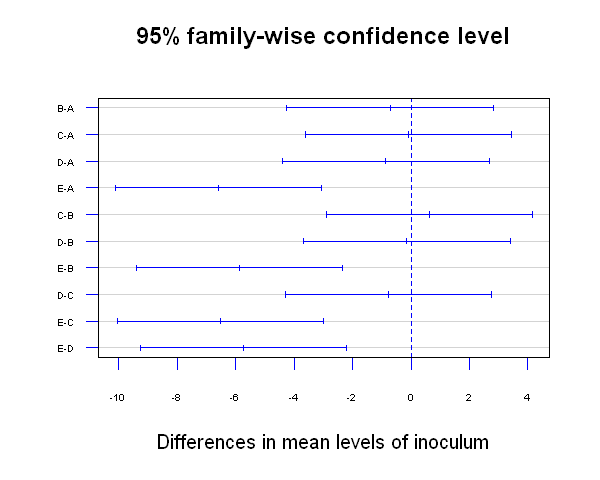

In [113]:
confidence_intervals = TukeyHSD(aov(yield ~ inoculum + shade +irrigation, data = alfalfa), 'inoculum')
confidence_intervals
options(repr.plot.width=5, repr.plot.height=4)
plot(confidence_intervals, las=1, cex.axis = 0.5, col = 'blue')

* Levels E-A, E-B, E-C, and E-D are significantly different.